In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

# Mozambique

In [2]:
a = '/home/zhmiao/datasets/ecology/Mozambique/Aardvark/2016_07_23_00_36_55.jpg'

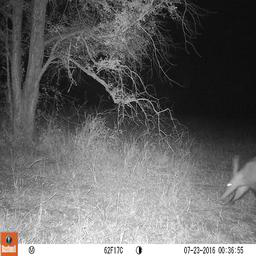